<h2 align="center"> Logistic Regression </h2>

## Logistic Regression, Machine Learning
---

So yes, we've been on this topic in the past, specifically during the Python section back a few weeks ago. We'll revisit this algorithm and take a deeper dive into this useful methodology.

Today, we will implement gradient descent and logistic regression from scratch using NumPy and Python, so you have a deeper understanding of the fundamentals of machine learning. We will accomplish this with the help of following tasks in the project:

- Task 1: Introduction and Project Overview
- Task 2: Load the Data and Import Libraries
- Task 3: Visualize the Data
- Task 4: Define the Logistic Sigmoid Function 𝜎(𝑧)
- Task 5: Compute the Cost Function 𝐽(𝜃) and Gradient
- Task 6: Cost and Gradient at Initialization
- Task 7: Implement Gradient Descent from Scratch
- Task 8: Plotting the Convergence of 𝐽(𝜃)
- Task 9: Plotting the Decision Boundary
- Task 10: Predictions Using the Optimized 𝜃 Values

### Task 2: Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
# column_names = ['DMV_Test_1', 'DMV_Test_2', 'Results']

In [4]:
data = pd.read_csv('DMV_Written_Tests.csv')

In [5]:
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
# sep scores
scores = data[['DMV_Test_1', 'DMV_Test_2']].values
results = data['Results'].values

### Task 3: Visualize the Data
---

In [8]:
passed = (results==1).reshape(100,1)
failed = (results==0).reshape(100,1)

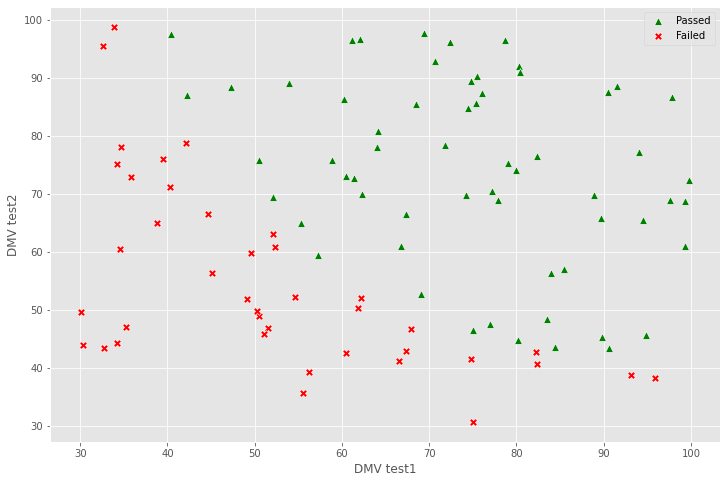

In [9]:
ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                    y = scores[passed[:, 0], 1],
                    marker = '^',
                    color='green',
                    s=60)
sns.scatterplot(x = scores[failed[:, 0], 0],
                    y = scores[failed[:, 0], 1],
                    marker = 'X',
                    color='red',
                    s=60)
ax.set(xlabel='DMV test1', ylabel='DMV test2')
ax.legend(['Passed','Failed'])

plt.show();

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [10]:
#define a function in python to rep the above
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

In [11]:
#let's test for zero
logistic_function(0)

0.5

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [12]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x, theta))
    error = (y * np.log(y_pred)) + (1 - y) * np.log(1 - y_pred)
    cost = -1/m * np.sum(error)
    gradient = 1/m * np.dot(x.transpose(), (y_pred - y))
    return cost[0], gradient

In [14]:
mean_scores= np.mean(scores, axis=0)
std_scores= np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores

rows = scores.shape[0]
cols = scores.shape[0]

X = np.append(np.ones((rows, 1)), scores, axis=1)
y = results.reshape(rows, 1)

theta_init = np.zeros((cols, + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradients at initialization", gradient)


ValueError: shapes (100,3) and (100,1,1) not aligned: 3 (dim 1) != 1 (dim 1)

### Task 6: Cost and Gradient at Initialization
---

In [ ]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores)/std_scores

rows = scores.shape[0]
cols = scores.shape[0]

X = np.append(np.ones((rows,1)), scores, axis=1)
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradients at initialization", gradient)



### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [ ]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$